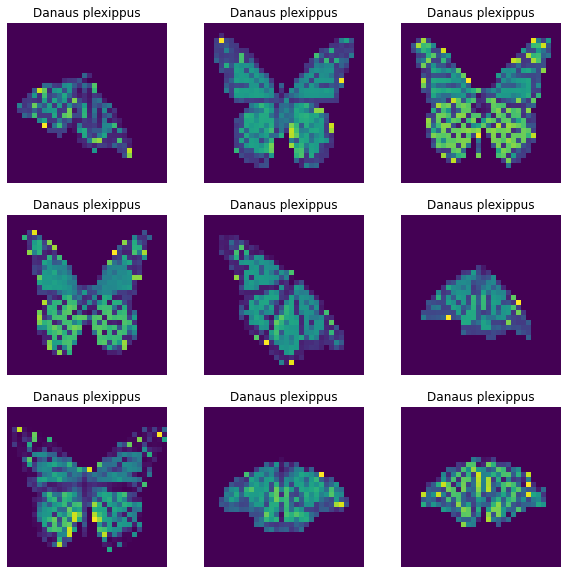

In [1]:
import os
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Makes one figure able to display multiple pictures
def display_multiple(images, titles, number = 1, rows = 1, cols=1):
    fig = plt.figure(figsize=(10, 10))
    for i in range(number):
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(titles[i])

# All the butterfly-types in the dataset
types = ['Danaus plexippus',
         'Heliconius charitonius',
         'Heliconius erato',
         'Junonia coenia',
         'Lycaena phlaeas',
         'Nymphalis antiopa',
         'Papilio cresphontes',
         'Pieris rapae',
         'Vanessa atalanta',
         'Vanessa cardui']
        
#
# Load data, greyscale
#

image_data = np.load('./Data/Gray32x32InputImage.npy')
type_name_data = np.load('./Data/Gray32x32OutputType.npy')

# Each pixel still has 3 values, all of which are the greyscale value
# Removing redundant pixel values
image_data = np.delete(image_data, [False, True, True], 3)

# Generate index based on name, as model.fit cannot use string
l = []
for name in type_name_data:
    l.append(types.index(name))
type_index_data = np.asarray(l)

display_multiple(image_data, type_name_data, 9, 3, 3)

In [2]:
#
# Splitting and Preprocessing data, greyscale
#

x_train, x_test, y_train, y_test = train_test_split(image_data, type_index_data, test_size=0.33)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)

(557, 32, 32, 1)
(557,)


In [3]:
#
# LeNet Model, greyscale
#

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='sigmoid', padding="valid", input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='sigmoid', padding="valid",),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(10)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                  keras.metrics.SparseTopKCategoricalAccuracy(3, name="top-3-accuracy")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               96120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Epoch 1/200
18/18 [==============================] - 5s 27ms/step - loss: 2.3265 - accuracy: 0.1203 - top-3-accuracy: 0.3375 - val_loss: 2.3212 - val_accuracy: 0.1018 - val_top-3-accuracy: 0.3127
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3231 - accuracy: 0.0934 - top-3-accuracy: 0.2908 - val_loss: 2.2886 - val_accuracy: 0.1164 - val_top-3-accuracy: 0.3236
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3021 - accuracy: 0.0952 - top-3-accuracy: 0.3088 - val_loss: 2.2961 - val_accuracy: 0.0982 - val_top-3-accuracy: 0.3345
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 2.2970 - accuracy: 0.1095 - top-3-accuracy: 0.3232 - val_loss: 2.2912 - val_accuracy: 0.1127 - val_top-3-accuracy: 0.2982
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 2.3038 - accuracy: 0.0844 - top-3-accuracy: 0.3106 - val_loss: 2.2844 - val_accuracy: 0.1345 - val_top-3-accuracy: 0.3382
Epoch 6/200
18/18 [=====

Epoch 43/200
18/18 [==============================] - 0s 6ms/step - loss: 1.3716 - accuracy: 0.5117 - top-3-accuracy: 0.8241 - val_loss: 1.5947 - val_accuracy: 0.3855 - val_top-3-accuracy: 0.7527
Epoch 44/200
18/18 [==============================] - 0s 6ms/step - loss: 1.3573 - accuracy: 0.5135 - top-3-accuracy: 0.8259 - val_loss: 1.5896 - val_accuracy: 0.4000 - val_top-3-accuracy: 0.7745
Epoch 45/200
18/18 [==============================] - 0s 6ms/step - loss: 1.3337 - accuracy: 0.5242 - top-3-accuracy: 0.8348 - val_loss: 1.5659 - val_accuracy: 0.4327 - val_top-3-accuracy: 0.7600
Epoch 46/200
18/18 [==============================] - 0s 7ms/step - loss: 1.3220 - accuracy: 0.5386 - top-3-accuracy: 0.8420 - val_loss: 1.5627 - val_accuracy: 0.4182 - val_top-3-accuracy: 0.7709
Epoch 47/200
18/18 [==============================] - 0s 7ms/step - loss: 1.2943 - accuracy: 0.5601 - top-3-accuracy: 0.8474 - val_loss: 1.5587 - val_accuracy: 0.4218 - val_top-3-accuracy: 0.7818
Epoch 48/200
18/18 [

Epoch 85/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.8312 - top-3-accuracy: 0.9641 - val_loss: 1.4580 - val_accuracy: 0.4982 - val_top-3-accuracy: 0.8145
Epoch 86/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6150 - accuracy: 0.8366 - top-3-accuracy: 0.9623 - val_loss: 1.4380 - val_accuracy: 0.4982 - val_top-3-accuracy: 0.8291
Epoch 87/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.8384 - top-3-accuracy: 0.9641 - val_loss: 1.4506 - val_accuracy: 0.4873 - val_top-3-accuracy: 0.8255
Epoch 88/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.8402 - top-3-accuracy: 0.9587 - val_loss: 1.4553 - val_accuracy: 0.4945 - val_top-3-accuracy: 0.8109
Epoch 89/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.8510 - top-3-accuracy: 0.9659 - val_loss: 1.4835 - val_accuracy: 0.4945 - val_top-3-accuracy: 0.8327
Epoch 90/200
18/18 [

Epoch 127/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1592 - accuracy: 0.9785 - top-3-accuracy: 0.9964 - val_loss: 1.5914 - val_accuracy: 0.5127 - val_top-3-accuracy: 0.8145
Epoch 128/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1545 - accuracy: 0.9767 - top-3-accuracy: 1.0000 - val_loss: 1.6211 - val_accuracy: 0.5236 - val_top-3-accuracy: 0.8364
Epoch 129/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1480 - accuracy: 0.9820 - top-3-accuracy: 0.9964 - val_loss: 1.6137 - val_accuracy: 0.5236 - val_top-3-accuracy: 0.8145
Epoch 130/200
18/18 [==============================] - 0s 7ms/step - loss: 0.1437 - accuracy: 0.9820 - top-3-accuracy: 0.9964 - val_loss: 1.6053 - val_accuracy: 0.5164 - val_top-3-accuracy: 0.8436
Epoch 131/200
18/18 [==============================] - 0s 7ms/step - loss: 0.1393 - accuracy: 0.9856 - top-3-accuracy: 0.9982 - val_loss: 1.6094 - val_accuracy: 0.5273 - val_top-3-accuracy: 0.8182
Epoch 132/200
1

18/18 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.8017 - val_accuracy: 0.5491 - val_top-3-accuracy: 0.8182
Epoch 169/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.7795 - val_accuracy: 0.5345 - val_top-3-accuracy: 0.8364
Epoch 170/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.8019 - val_accuracy: 0.5382 - val_top-3-accuracy: 0.8327
Epoch 171/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.8020 - val_accuracy: 0.5491 - val_top-3-accuracy: 0.8218
Epoch 172/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.7997 - val_accuracy: 0.5382 - val_top-3-accuracy: 0.8291
Epoch 173/200
18/18 [========

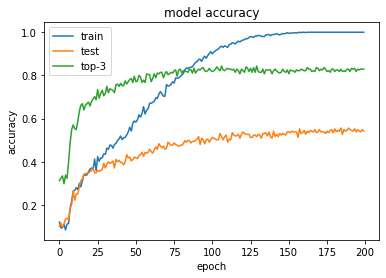

In [4]:
#
# Fit and Test, greyscale
#

start = time.time()

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

training_time = time.time() - start

test_loss, test_acc, top_3_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)
print('\Training time in seconds:', training_time)
print(f"Test top 3 accuracy: {round(top_3_accuracy * 100, 2)}%")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_top-3-accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'top-3'], loc='upper left')
plt.show()

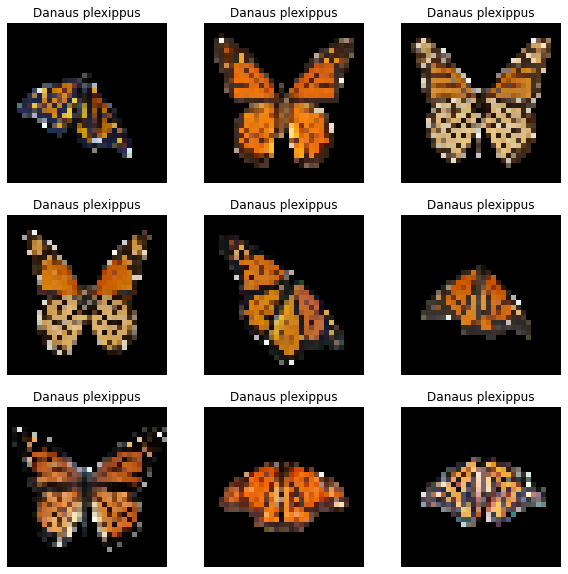

In [5]:
#
# Load data, now with RGB
#

image_data = np.load('./Data/RGB32x32InputImage.npy')
type_name_data = np.load('./Data/RGB32x32OutputType.npy')

# Generate index based on name, as model.fit cannot use string
l = []
for name in type_name_data:
    l.append(types.index(name))
type_index_data = np.asarray(l)

display_multiple(image_data, type_name_data, 9, 3, 3)

In [6]:
#
# Splitting and Preprocessing data, RGB
#

x_train, x_test, y_train, y_test = train_test_split(image_data, type_index_data, test_size=0.33)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)

(557, 32, 32, 3)
(557,)


In [7]:
#
# LeNet Model, RGB
#

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='sigmoid', padding="valid", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='sigmoid', padding="valid",),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(10)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                  keras.metrics.SparseTopKCategoricalAccuracy(3, name="top-3-accuracy")])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               96120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

Epoch 1/200
18/18 [==============================] - 1s 26ms/step - loss: 2.3630 - accuracy: 0.0790 - top-3-accuracy: 0.2962 - val_loss: 2.3115 - val_accuracy: 0.1127 - val_top-3-accuracy: 0.3273
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 2.3068 - accuracy: 0.1257 - top-3-accuracy: 0.3070 - val_loss: 2.2914 - val_accuracy: 0.0982 - val_top-3-accuracy: 0.3273
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 2.2988 - accuracy: 0.0880 - top-3-accuracy: 0.3124 - val_loss: 2.2925 - val_accuracy: 0.1164 - val_top-3-accuracy: 0.3273
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3007 - accuracy: 0.1077 - top-3-accuracy: 0.3124 - val_loss: 2.3000 - val_accuracy: 0.1127 - val_top-3-accuracy: 0.2945
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 2.3031 - accuracy: 0.1239 - top-3-accuracy: 0.2962 - val_loss: 2.2913 - val_accuracy: 0.1127 - val_top-3-accuracy: 0.3273
Epoch 6/200
18/18 [=====

Epoch 43/200
18/18 [==============================] - 0s 8ms/step - loss: 1.3538 - accuracy: 0.5063 - top-3-accuracy: 0.8456 - val_loss: 1.5301 - val_accuracy: 0.4327 - val_top-3-accuracy: 0.8000
Epoch 44/200
18/18 [==============================] - 0s 6ms/step - loss: 1.3468 - accuracy: 0.5063 - top-3-accuracy: 0.8420 - val_loss: 1.5713 - val_accuracy: 0.4000 - val_top-3-accuracy: 0.7636
Epoch 45/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2867 - accuracy: 0.5458 - top-3-accuracy: 0.8654 - val_loss: 1.4827 - val_accuracy: 0.4618 - val_top-3-accuracy: 0.7818
Epoch 46/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2654 - accuracy: 0.5512 - top-3-accuracy: 0.8582 - val_loss: 1.4945 - val_accuracy: 0.4327 - val_top-3-accuracy: 0.7927
Epoch 47/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2580 - accuracy: 0.5548 - top-3-accuracy: 0.8618 - val_loss: 1.5049 - val_accuracy: 0.4509 - val_top-3-accuracy: 0.7891
Epoch 48/200
18/18 [

Epoch 85/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.8079 - top-3-accuracy: 0.9695 - val_loss: 1.0654 - val_accuracy: 0.6545 - val_top-3-accuracy: 0.8873
Epoch 86/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.7953 - top-3-accuracy: 0.9587 - val_loss: 1.0330 - val_accuracy: 0.6400 - val_top-3-accuracy: 0.8945
Epoch 87/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6082 - accuracy: 0.8151 - top-3-accuracy: 0.9695 - val_loss: 1.0125 - val_accuracy: 0.6836 - val_top-3-accuracy: 0.8945
Epoch 88/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.8169 - top-3-accuracy: 0.9785 - val_loss: 1.0880 - val_accuracy: 0.6400 - val_top-3-accuracy: 0.8836
Epoch 89/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5674 - accuracy: 0.8366 - top-3-accuracy: 0.9749 - val_loss: 1.0416 - val_accuracy: 0.6509 - val_top-3-accuracy: 0.8909
Epoch 90/200
18/18 [

Epoch 127/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2052 - accuracy: 0.9569 - top-3-accuracy: 0.9982 - val_loss: 0.9958 - val_accuracy: 0.6800 - val_top-3-accuracy: 0.9018
Epoch 128/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.9605 - top-3-accuracy: 0.9964 - val_loss: 0.9827 - val_accuracy: 0.6909 - val_top-3-accuracy: 0.9018
Epoch 129/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1928 - accuracy: 0.9659 - top-3-accuracy: 0.9964 - val_loss: 1.0032 - val_accuracy: 0.6764 - val_top-3-accuracy: 0.8982
Epoch 130/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1883 - accuracy: 0.9641 - top-3-accuracy: 0.9982 - val_loss: 1.0058 - val_accuracy: 0.6800 - val_top-3-accuracy: 0.9091
Epoch 131/200
18/18 [==============================] - 0s 6ms/step - loss: 0.1833 - accuracy: 0.9677 - top-3-accuracy: 0.9982 - val_loss: 0.9907 - val_accuracy: 0.6836 - val_top-3-accuracy: 0.9091
Epoch 132/200
1

18/18 [==============================] - 0s 6ms/step - loss: 0.0589 - accuracy: 0.9964 - top-3-accuracy: 1.0000 - val_loss: 1.0260 - val_accuracy: 0.7200 - val_top-3-accuracy: 0.9018
Epoch 169/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0585 - accuracy: 0.9964 - top-3-accuracy: 1.0000 - val_loss: 1.0231 - val_accuracy: 0.7200 - val_top-3-accuracy: 0.8982
Epoch 170/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0543 - accuracy: 1.0000 - top-3-accuracy: 1.0000 - val_loss: 1.0471 - val_accuracy: 0.7200 - val_top-3-accuracy: 0.8982
Epoch 171/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0529 - accuracy: 0.9964 - top-3-accuracy: 1.0000 - val_loss: 1.0363 - val_accuracy: 0.7236 - val_top-3-accuracy: 0.9018
Epoch 172/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0535 - accuracy: 0.9982 - top-3-accuracy: 1.0000 - val_loss: 1.0263 - val_accuracy: 0.7164 - val_top-3-accuracy: 0.8982
Epoch 173/200
18/18 [========

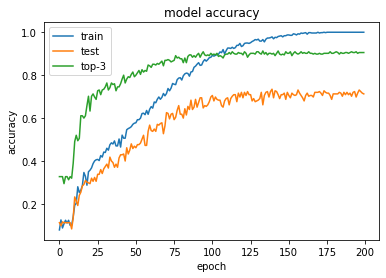

In [8]:
#
# Fit and Test, RGB
#

start = time.time()

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

training_time = time.time() - start

test_loss, test_acc, top_3_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)
print('\nTraining time in seconds:', training_time)
print(f"Test top 3 accuracy: {round(top_3_accuracy * 100, 2)}%")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_top-3-accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'top-3'], loc='upper left')
plt.show()